<a href="https://colab.research.google.com/github/nupur1262/trying_face_detection/blob/master/3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -o "export.pkl" "https://drive.google.com/uc?id=1cw8_PkwVfT58CIYmkdmvueKVZtRVhZzl"

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore")

In [4]:
predictor = load_learner('/content/drive/My Drive/face-detection-final/')

In [5]:
def my_predictor(pic):
  test_img =open_image(pic)
  pred_class,pred_idx,outputs=predictor.predict(test_img)
  return pred_class

In [6]:
!wget -O "haarcascade_frontalface_default.xml" "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml"

--2020-08-28 14:29:35--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.08s   

2020-08-28 14:29:35 (11.4 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In [9]:
import cv2
import dlib
import os
from imutils import face_utils
from PIL import Image
face_detector = dlib.get_frontal_face_detector()   
def face_finder(image_link):
  img=cv2.imread(image_link)
  frame = img
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  rects = face_detector(gray,0)
  data=[]
  for rect in rects:
    (x1,y1,x2,y2) = face_utils.rect_to_bb(rect) 
    data.append([x1,y1,x2,y2])
  return face_cropper(image_link,data)
def face_cropper(image_link,rects):
  cropped_images=[]
  for rect in rects:
    my_image=Image.open(image_link)
    x1=rect[0]
    y1=rect[1]
    x2=rect[2]
    y2=rect[3]
    cropped_images.append(my_image.crop((x1,y1,x1+x2,y1+y2)))
  return cropped_images

In [47]:
img1 = face_finder("/content/drive/My Drive/testing/download (4).jpg")

In [48]:
len(img1)

1

me


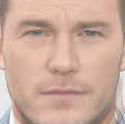

In [49]:
img1[0].save("face.jpg")
print(my_predictor('/content/face.jpg'))
img2 = open_image("/content/face.jpg")
img2

In [35]:
print(my_predictor('/content/drive/My Drive/testing/WhatsApp Image 2020-08-28 at 7.04.59 PM (7).jpeg'))

me


not_me


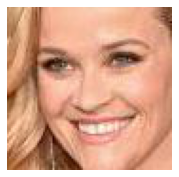

In [38]:
print(my_predictor("/content/drive/My Drive/testing/images (9).jpg"))
img5 = open_image("/content/drive/My Drive/testing/images (9).jpg")
img5.show()

In [44]:
import cv2
test_files=os.listdir("/content/drive/My Drive/testing")
os.makedirs("test_result",exist_ok=True)
i=0
for test_file in test_files:
  img=cv2.imread(f'/content/drive/My Drive/testing/{test_file}')
  cv2.imwrite("temp.jpg",img)
  ans_text=my_predictor("temp.jpg")
  font = cv2.FONT_HERSHEY_SIMPLEX 
  i+=1
  org = (0, 50) 
  fontScale = 0.5
  color = (255, 225, 0) 
  thickness = 1
  img = cv2.putText(img, str(ans_text), org, font,fontScale, color, thickness, cv2.LINE_AA) 
  cv2.imwrite("test_result/"+str(i)+".jpg", img)